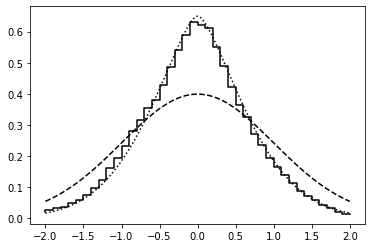

In [1]:
import torch 
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
class model(nn.Module):
    def __init__(self,starting_value):
        super(model,self).__init__()
        theta=torch.FloatTensor((starting_value,))
        self.theta=nn.Parameter(theta)
    
    def log_posterior(self):
        return -0.5*self.theta**2 -0.5*torch.log(torch.tensor((2*3.14159,)))

m=model(0.1)
from AdamSGLD import AdamSGLD

optim=AdamSGLD(model=m,a=1,lamb=1e-1,alpha=0.9,beta=0.5,stepsize=0.0001)
bins=np.zeros(shape=(41))

samples=[]
for step in range(10000000):
        lp=m.log_posterior()
        lp.backward()
        optim.step(m)
        sample=m.theta.item()
        bin_int=int(sample*10)
        # Correcting for int rounding up below zero and down above zero   
        if sample<0:
             bin_int+=20
        else:
             bin_int+=21         
        if bin_int>=0 and bin_int<41:
            bins[bin_int]+=1



import matplotlib.pyplot as plt
axis=np.linspace(-2,2,41)
est_dens=bins/(10000000*0.1)
fine_axis=np.linspace(-2,2,400)
pred_dens=2.0495/(2*3.141593)**0.5*np.exp(-0.5*fine_axis**2)*np.exp(-np.abs(fine_axis))*(1e-1+np.abs(fine_axis))**(1e-1)
target_dens=1/(2*3.141593)**0.5*np.exp(-0.5*fine_axis**2)
plt.step(axis, est_dens,label=r'$\hat{\pi}(\theta)$',color='black')
plt.plot(fine_axis,pred_dens,label=r'$\pi(\theta)$',color='black',linestyle='dotted')
plt.plot(fine_axis,target_dens,label=r'$p(\theta|D)$',color='black',linestyle='dashed')
#plt.legend()